In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split


# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [2]:
def load_and_preprocess_images(folder_path, picture_size):
    images = []
    labels = []
    emotion_labels = sorted(os.listdir(folder_path))  # Lấy danh sách các thư mục (nhãn cảm xúc)

    for label in emotion_labels:
        label_path = os.path.join(folder_path, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Chuyển đổi ảnh sang màu xám
            image = cv2.resize(image, (picture_size, picture_size))  # Thay đổi kích thước ảnh
            image = image.astype('float32') / 255.0  # Chuẩn hóa ảnh
            images.append(image)
            labels.append(emotion_labels.index(label))  # Gán nhãn cảm xúc

    images = np.array(images)
    labels = np.array(labels)

    # Chuyển đổi hình ảnh thành định dạng phù hợp cho mô hình Keras
    images = np.expand_dims(images, -1)
    return images, labels



In [3]:
folder_path_train = 'images/train'
folder_path_val = 'images/validation'
picture_size = 100

In [4]:
train_images, train_labels = load_and_preprocess_images(folder_path_train, picture_size)
val_images, val_labels = load_and_preprocess_images(folder_path_val, picture_size)

In [5]:
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)

In [6]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(picture_size, picture_size, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Sử dụng softmax cho phân loại đa lớp
])

C:\Users\theng\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='categorical_crossentropy',  # Sử dụng categorical crossentropy cho phân loại đa lớp
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
history = model.fit(
    train_images, train_labels,
    epochs=30,
    validation_data=(val_images, val_labels)
)

Epoch 1/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 85s 92ms/step - accuracy: 0.2728 - loss: 1.7599 - val_accuracy: 0.4086 - val_loss: 1.5270
Epoch 2/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.4481 - loss: 1.4280 - val_accuracy: 0.4747 - val_loss: 1.3390
Epoch 3/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.5102 - loss: 1.2882 - val_accuracy: 0.5231 - val_loss: 1.2486
Epoch 4/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 86s 95ms/step - accuracy: 0.5597 - loss: 1.1624 - val_accuracy: 0.5487 - val_loss: 1.1933
Epoch 5/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 89s 99ms/step - accuracy: 0.6057 - loss: 1.0440 - val_accuracy: 0.5623 - val_loss: 1.1690
Epoch 6/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 85s 94ms/step - accuracy: 0.6494 - loss: 0.9304 - val_accuracy: 0.5613 - val_loss: 1.2009
Epoch 7/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.7013 - loss: 0.8049 - val_accuracy: 0.5652 - val_loss: 1.2560
Epoch 8/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 88s 98ms/step - accuracy: 0.7572 - loss: 0.6638 - 

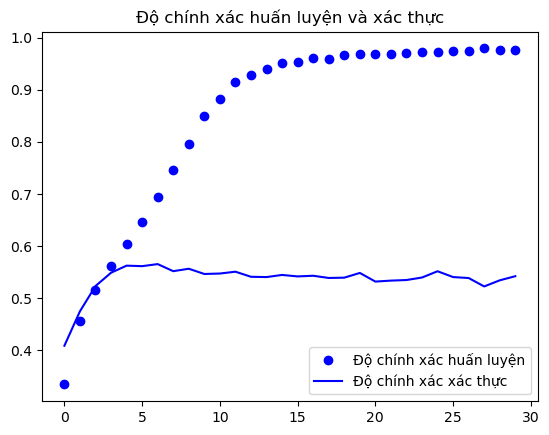

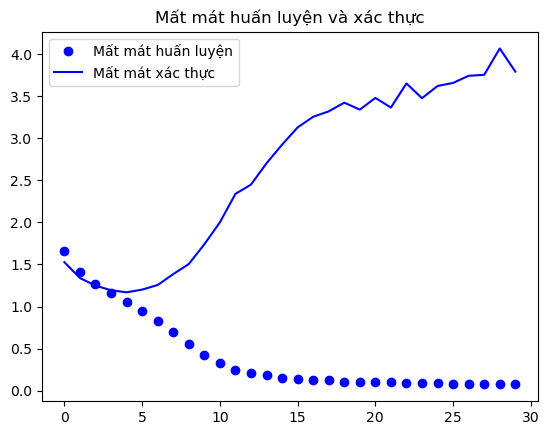

In [9]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo', label='Độ chính xác huấn luyện')
    plt.plot(epochs, val_acc, 'b', label='Độ chính xác xác thực')
    plt.title('Độ chính xác huấn luyện và xác thực')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Mất mát huấn luyện')
    plt.plot(epochs, val_loss, 'b', label='Mất mát xác thực')
    plt.title('Mất mát huấn luyện và xác thực')
    plt.legend()
    
    plt.show()

plot_history(history)

In [10]:
print("Độ chính xác huấn luyện cuối cùng:", history.history['accuracy'][-1])
print("Độ chính xác xác thực cuối cùng:", history.history['val_accuracy'][-1])
print("Mất mát huấn luyện cuối cùng:", history.history['loss'][-1])
print("Mất mát xác thực cuối cùng:", history.history['val_loss'][-1])

Độ chính xác huấn luyện cuối cùng: 0.9757468700408936
Độ chính xác xác thực cuối cùng: 0.5420322418212891
Mất mát huấn luyện cuối cùng: 0.079875648021698
Mất mát xác thực cuối cùng: 3.7938950061798096


In [11]:
model.save('emotion4_model.h5')